# Dataset Creation
Competition Objective - Predict Youtube Video View Counts

In [118]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv('youtube-trending-video-dataset/US_youtube_trending_data.csv')
df['trending_date'] = pd.to_datetime(df['trending_date']).dt.date
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['id'] = df['video_id'] + '_' + df['trending_date'].astype('str')
df = df.drop_duplicates(subset=['id']).reset_index(drop=True).copy()

In [121]:
[c for c in df.columns]

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description',
 'id']

In [122]:
df['isTest'] = df['trending_date'] >= pd.to_datetime('2021-12-01').date()

In [123]:
train_df = df.query('isTest == False').copy()
test_df = df.query('isTest == True').copy()

train_df = train_df.drop(['isTest'], axis=1).reset_index(drop=True).copy()
solution_df = test_df.drop(['isTest'], axis=1).reset_index(drop=True).copy()
test_df = test_df.drop(['view_count','likes','dislikes','comment_count'], axis=1).reset_index(drop=True).copy()

In [128]:
train_df.to_parquet('train.parquet')
test_df.to_parquet('test.parquet')

In [82]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)
train_df[['id','view_count']].head().to_csv('sample_submission.csv', index=False)

In [140]:
%matplotlib inline

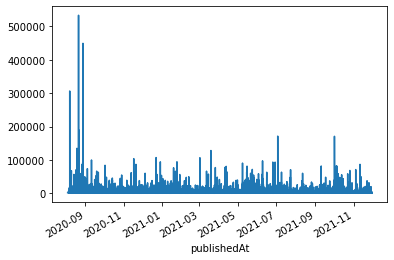

In [143]:
train_df.groupby('publishedAt')['dislikes'].mean().plot()

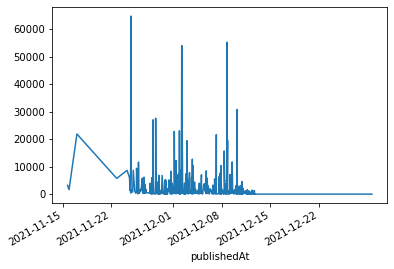

In [144]:
solution_df.groupby('publishedAt')['dislikes'].mean().plot()

In [88]:
solution_df[['id','view_count']].to_csv('solution.csv', index=False)

In [91]:
average_solution = solution_df[['id','view_count']].copy()
average_solution['view_count'] = int(np.round(solution_df['view_count'].mean()))
average_solution.to_csv('avg_solution.csv', index=False)

In [107]:
test_df[['id']].head()

,id
0,_wNsZEqpKUA_2021-12-01
1,2jfbXZiE6Lc_2021-12-01
2,F1Hq8eVOMHs_2021-12-01
3,GQXVQmcGQUY_2021-12-01
4,n4XojTb6pfs_2021-12-01


In [111]:
pd.read_csv('train.csv', engine='python' )

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146739.0,2794.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353787.0,2628.0,40221.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10.0,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23251.0,1856.0,7647.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45802.0,964.0,2196.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105540,H1tQhK0n5Qk,thanks for 5 million,2021-11-23 19:13:46+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23.0,2021-11-30,danny gonzalez|funny|commentary|comedy|react|r...,536056.0,109352.0,550.0,4374.0,https://i.ytimg.com/vi/H1tQhK0n5Qk/default.jpg,False,False,#shorts,H1tQhK0n5Qk_2021-11-30
105541,3CuO39VL3rk,Mrs. Rogers done F’ed up😅 #shorts #story #come...,2021-11-24 23:48:37+00:00,UCqseWqrl7r-hNoWme7hIfTw,Rebecca Rogers (Mrs. Rogers),23.0,2021-11-30,[None],863236.0,116742.0,1161.0,583.0,https://i.ytimg.com/vi/3CuO39VL3rk/default.jpg,False,False,NaN,3CuO39VL3rk_2021-11-30
105542,qfDVsuwg0TU,MY NEW KITCHEN REVEAL!!!!! EXCITING,2021-11-23 22:50:19+00:00,UCnB4LOZe6Dc5JUH9EoaHhKQ,Bri & Fern,1.0,2021-11-30,10-19-21,194119.0,14569.0,180.0,5276.0,https://i.ytimg.com/vi/qfDVsuwg0TU/default.jpg,False,False,Contracter email: Los3topetes@gmail.comFOLLOW ...,qfDVsuwg0TU_2021-11-30
105543,HHbF8HaC4w8,Using Reverse Psychology To Get ANYTHING You Want,2021-11-21 21:15:16+00:00,UCQNDoTI2g7_daH6zL_9rvWg,Amyy Woahh,23.0,2021-11-30,[None],24584472.0,1457618.0,61893.0,3610.0,https://i.ytimg.com/vi/HHbF8HaC4w8/default.jpg,False,False,NaN,HHbF8HaC4w8_2021-11-30
